In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
import numpy as np

In [9]:
covid_19_cases = pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")

In [10]:
covid_19_cases = covid_19_cases.T
covid_19_cases.head()

,0,1,2,3,4,5,6,7,8,9,...,259,260,261,262,263,264,265,266,267,268
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Lat,33.9391,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,-32.5228,41.3775,-15.3767,6.4238,14.0583,31.9522,24.2155,15.5527,-13.1339,-19.0154
Long,67.71,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.012,151.209,...,-55.7658,64.5853,166.959,-66.5897,108.277,35.2332,-12.8858,48.5164,27.8493,29.1549
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
covid_19_cases
new_header = covid_19_cases.iloc[0]

In [12]:
covid_19_cases.iloc[0]

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
264    NaN
265    NaN
266    NaN
267    NaN
268    NaN
Name: Province/State, Length: 269, dtype: object

In [13]:
for i, cell in enumerate(covid_19_cases.iloc[0]):
    covid_19_cases.iloc[0][i] = str(str(covid_19_cases.iloc[0][i]) + ", ").replace("nan, ", "") + str(covid_19_cases.iloc[1][i])

In [14]:
covid_19_cases.iloc[0][0]

'Afghanistan'

In [15]:
covid_19_cases.columns = new_header
covid_19_cases = covid_19_cases.drop(['Country/Region','Lat','Long', 'Province/State'])

In [16]:
covid_19_cases.rename(columns={'Province/State': 'Date'}, inplace=True)

In [17]:
covid_19_cases.index = pd.to_datetime(covid_19_cases.index)

In [18]:
covid_19_cases

Province/State,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,"Australian Capital Territory, Australia","New South Wales, Australia",...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-12,42795,26211,65108,5616,13053,131,1284519,112680,114,4469,...,3795,69560,1,96140,1253,60784,10,2071,17056,8696
2020-11-13,42969,26701,65975,5725,13228,133,1296378,114383,114,4469,...,3883,69754,1,96441,1256,61514,10,2072,17093,8765
2020-11-14,43035,27233,66819,5725,13374,134,1304846,115855,114,4486,...,3957,69987,1,96933,1265,62167,10,2072,17097,8786
2020-11-15,43240,27830,67679,5872,13451,134,1310491,117337,114,4498,...,4030,70243,1,97352,1281,63031,10,2072,17123,8829


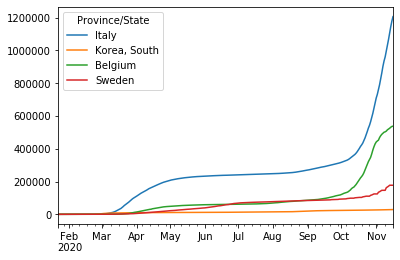

In [22]:
covid_19_cases[["Italy", "Korea, South", "Belgium", "Sweden"]].plot()

In [ ]:
china = [column for column in covid_19_cases.columns if 'China' in column]

In [ ]:
covid_19_cases[china].plot()

In [ ]:
hubei = covid_19_cases["Hubei, China"]

In [ ]:
hubei = np.array(hubei)[0:20].astype(float)

In [ ]:
hubei
x = np.arange(0, len(hubei)).astype(float)

In [ ]:
plt.plot(x, hubei)

In [ ]:
np.polyfit(x, hubei, 2)
p2 = np.poly1d(np.polyfit(x, hubei, 2))
p2

In [ ]:
plt.plot(x, hubei, '.', x, p2(x), '-')

In [ ]:
import scipy.stats as stats

In [ ]:
r, p = stats.pearsonr(hubei, p2(x))
r

In [ ]:
italy = covid_19_cases["Italy"]

In [ ]:
italy = np.array(italy)[29:].astype(float)

In [ ]:
italy

In [ ]:
x = np.arange(0, len(italy)).astype(float)

In [ ]:
plt.plot(x, italy)

In [ ]:
np.polyfit(x, italy, 2)
p2 = np.poly1d(np.polyfit(x, italy, 2))
p2

In [ ]:
plt.plot(x, italy)
plt.yscale('log')

In [ ]:
r, p = stats.pearsonr(italy, p2(x))
r

In [ ]:
italy = covid_19_cases["Italy"]
belgium = covid_19_cases["Belgium"]

In [ ]:
france = covid_19_cases["France, France"]

In [ ]:
france = [day for day in france if day > 100]
belgium = [day for day in belgium if day > 100]

In [ ]:
list(italy)

In [ ]:
france = [day for day in france if day > 100]

In [ ]:
france

In [ ]:
plt.plot(france, '-', italy, '.')
plt.yscale('log')